# House Price Regression Project

In [66]:
from warnings import filterwarnings
filterwarnings("ignore")

# Data Ingestion

In [67]:
import pandas as pd

In [68]:
path = r"C:\Users\Saurav Mali\Downloads\BasicPython\Python Recording\python Class\MACHINE LEARNING\ML PDF AND CSV\MLR PROJECT\training_set.csv"

In [69]:
df = pd.read_csv(path, na_values=["", "NA"], keep_default_na=False)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Target Feature - Sales Price

# Data quality chceck

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [71]:
m = df.isna().sum()
m [m>0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [72]:
df.duplicated().sum()

np.int64(0)

# Separate X and Y(SalePrice)

In [73]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [74]:
X = df.drop(columns = ["Id", "SalePrice"])
Y = df[["SalePrice"]]

In [75]:
X.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [76]:
Y.head()

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000


<Axes: xlabel='SalePrice', ylabel='Count'>

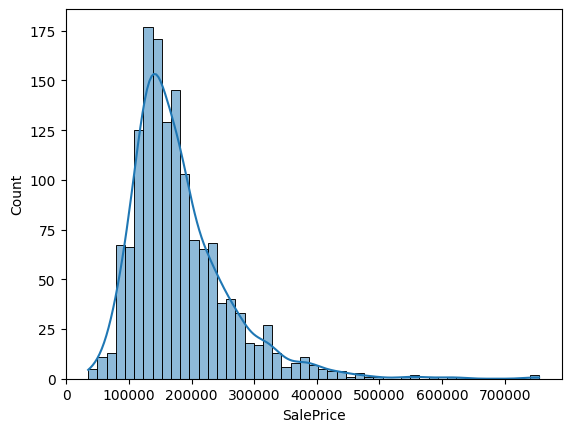

In [77]:
import seaborn as sns
sns.histplot(data=df, x="SalePrice", kde=True)

In [78]:
X.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
                  ...   
MiscVal            int64
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
Length: 79, dtype: object

In [79]:
cat = list(X.columns[X.dtypes=="object"])
con = list(X.columns[X.dtypes!="object"])

In [80]:
cat

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [81]:
con

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [82]:
from sklearn.pipeline import make_pipeline # To perform multiple operations in one go
from sklearn.impute import SimpleImputer # To replace missing values
from sklearn.preprocessing import StandardScaler, OrdinalEncoder # Converting all data in numerical format
from sklearn.compose import ColumnTransformer # Combinig numerical and categorical pipeline

In [83]:
num_pipe = make_pipeline(
    SimpleImputer(strategy="mean"),
    StandardScaler()
)

In [84]:
cat_pipe = make_pipeline(
    SimpleImputer(strategy="constant", fill_value="Not_Avl"),
    OrdinalEncoder()
)

In [85]:
pre1 = ColumnTransformer(
    [
        ("num",num_pipe,con),
        ("cat",cat_pipe,cat)
    ]
).set_output(transform="pandas")

In [86]:
pre1

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['MSSubClass', 'LotFrontage', 'LotArea',
                                  'OverallQual', 'OverallCond', 'YearBuilt',
                                  'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
                                  'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
                                  '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
                                  'GrLivArea', 'BsmtFullBath', '...
                                 ['MSZoning', 'Street', 'Alley', 'LotShape',
                                  'LandContour', 'Utilities', 'LotConfig',
                                  'LandSlope', 'Neighborhood', 'Condition1',
                                  'Condition2', 'BldgType', 'HouseStyle',
                                  'RoofStyle', 'RoofMatl', 'Exterior1st',
                                  'Exterior2nd', 'MasVnrType', 'ExterQual',
                                  'ExterCond', 'Foundation', 'BsmtQual',
                                  'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
                                  'BsmtFinType2', 'Heating', 'HeatingQC',
                                  'CentralAir', 'Electrical', ...])])

In [87]:
X_pre = pre1.fit_transform(X)
X_pre.head()

,num__MSSubClass,num__LotFrontage,num__LotArea,num__OverallQual,num__OverallCond,num__YearBuilt,num__YearRemodAdd,num__MasVnrArea,num__BsmtFinSF1,num__BsmtFinSF2,...,cat__GarageType,cat__GarageFinish,cat__GarageQual,cat__GarageCond,cat__PavedDrive,cat__PoolQC,cat__Fence,cat__MiscFeature,cat__SaleType,cat__SaleCondition
0,0.073375,-0.229372,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.511418,0.575425,-0.288653,...,1.0,2.0,5.0,5.0,2.0,3.0,4.0,1.0,8.0,4.0
1,-0.872563,0.451936,-0.091886,-0.071836,2.179628,0.156734,-0.429577,-0.574410,1.171992,-0.288653,...,1.0,2.0,5.0,5.0,2.0,3.0,4.0,1.0,8.0,4.0
2,0.073375,-0.093110,0.073480,0.651479,-0.517200,0.984752,0.830215,0.323060,0.092907,-0.288653,...,1.0,2.0,5.0,5.0,2.0,3.0,4.0,1.0,8.0,4.0
3,0.309859,-0.456474,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.574410,-0.499274,-0.288653,...,5.0,3.0,5.0,5.0,2.0,3.0,4.0,1.0,8.0,0.0
4,0.073375,0.633618,0.375148,1.374795,-0.517200,0.951632,0.733308,1.364570,0.463568,-0.288653,...,1.0,2.0,5.0,5.0,2.0,3.0,4.0,1.0,8.0,4.0


In [88]:
pre1

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['MSSubClass', 'LotFrontage', 'LotArea',
                                  'OverallQual', 'OverallCond', 'YearBuilt',
                                  'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
                                  'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
                                  '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
                                  'GrLivArea', 'BsmtFullBath', '...
                                 ['MSZoning', 'Street', 'Alley', 'LotShape',
                                  'LandContour', 'Utilities', 'LotConfig',
                                  'LandSlope', 'Neighborhood', 'Condition1',
                                  'Condition2', 'BldgType', 'HouseStyle',
                                  'RoofStyle', 'RoofMatl', 'Exterior1st',
                                  'Exterior2nd', 'MasVnrType', 'ExterQual',
                                  'ExterCond', 'Foundation', 'BsmtQual',
                                  'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
                                  'BsmtFinType2', 'Heating', 'HeatingQC',
                                  'CentralAir', 'Electrical', ...])])

# Feature Selection

In [89]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SequentialFeatureSelector

In [90]:
model = LinearRegression()

sel = SequentialFeatureSelector(model,direction="forward",n_features_to_select="auto")

sel.fit(X_pre,Y)

SequentialFeatureSelector(estimator=LinearRegression())

In [91]:
imp_cols = sel.get_feature_names_out()
imp_cols

array(['num__MSSubClass', 'num__LotArea', 'num__OverallQual',
       'num__OverallCond', 'num__YearBuilt', 'num__MasVnrArea',
       'num__BsmtFinSF1', 'num__GrLivArea', 'num__BsmtFullBath',
       'num__KitchenAbvGr', 'num__TotRmsAbvGrd', 'num__Fireplaces',
       'num__GarageCars', 'num__WoodDeckSF', 'num__OpenPorchSF',
       'num__ScreenPorch', 'num__PoolArea', 'num__YrSold', 'cat__Street',
       'cat__LandContour', 'cat__Utilities', 'cat__Neighborhood',
       'cat__BldgType', 'cat__HouseStyle', 'cat__RoofStyle',
       'cat__RoofMatl', 'cat__Exterior1st', 'cat__MasVnrType',
       'cat__ExterQual', 'cat__BsmtQual', 'cat__BsmtCond',
       'cat__BsmtExposure', 'cat__HeatingQC', 'cat__KitchenQual',
       'cat__Functional', 'cat__GarageCond', 'cat__PavedDrive',
       'cat__Fence', 'cat__MiscFeature'], dtype=object)

In [92]:
len(imp_cols)

39

In [93]:
imp_cols[0]

'num__MSSubClass'

In [94]:
imp_cols[0].split("__")

['num', 'MSSubClass']

In [95]:
imp_cols[0].split("__")[1]

'MSSubClass'

In [96]:
imp_sel_cols = [col.split("__")[1] for col in imp_cols]
imp_sel_cols

['MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'MasVnrArea',
 'BsmtFinSF1',
 'GrLivArea',
 'BsmtFullBath',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'WoodDeckSF',
 'OpenPorchSF',
 'ScreenPorch',
 'PoolArea',
 'YrSold',
 'Street',
 'LandContour',
 'Utilities',
 'Neighborhood',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'MasVnrType',
 'ExterQual',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'HeatingQC',
 'KitchenQual',
 'Functional',
 'GarageCond',
 'PavedDrive',
 'Fence',
 'MiscFeature']

In [97]:
X_sel = X[imp_sel_cols]
X_sel

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,MasVnrArea,BsmtFinSF1,GrLivArea,BsmtFullBath,KitchenAbvGr,...,BsmtQual,BsmtCond,BsmtExposure,HeatingQC,KitchenQual,Functional,GarageCond,PavedDrive,Fence,MiscFeature
0,60,8450,7,5,2003,196.0,706,1710,1,1,...,Gd,TA,No,Ex,Gd,Typ,TA,Y,NaN,NaN
1,20,9600,6,8,1976,0.0,978,1262,0,1,...,Gd,TA,Gd,Ex,TA,Typ,TA,Y,NaN,NaN
2,60,11250,7,5,2001,162.0,486,1786,1,1,...,Gd,TA,Mn,Ex,Gd,Typ,TA,Y,NaN,NaN
3,70,9550,7,5,1915,0.0,216,1717,1,1,...,TA,Gd,No,Gd,Gd,Typ,TA,Y,NaN,NaN
4,60,14260,8,5,2000,350.0,655,2198,1,1,...,Gd,TA,Av,Ex,Gd,Typ,TA,Y,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,7917,6,5,1999,0.0,0,1647,0,1,...,Gd,TA,No,Ex,TA,Typ,TA,Y,NaN,NaN
1456,20,13175,6,6,1978,119.0,790,2073,1,1,...,Gd,TA,No,TA,TA,Min1,TA,Y,MnPrv,NaN
1457,70,9042,7,9,1941,0.0,275,2340,0,1,...,TA,Gd,No,Ex,Gd,Typ,TA,Y,GdPrv,Shed
1458,20,9717,5,6,1950,0.0,49,1078,1,1,...,TA,TA,Mn,Gd,Gd,Typ,TA,Y,NaN,NaN


# Preprocessing pipeline for X_sel

In [98]:
cat_sel = list(X_sel.columns[X_sel.dtypes == "object"])
con_sel = list(X_sel.columns[X_sel.dtypes != "object"])

In [99]:
cat_sel

['Street',
 'LandContour',
 'Utilities',
 'Neighborhood',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'MasVnrType',
 'ExterQual',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'HeatingQC',
 'KitchenQual',
 'Functional',
 'GarageCond',
 'PavedDrive',
 'Fence',
 'MiscFeature']

In [100]:
con_sel

['MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'MasVnrArea',
 'BsmtFinSF1',
 'GrLivArea',
 'BsmtFullBath',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'WoodDeckSF',
 'OpenPorchSF',
 'ScreenPorch',
 'PoolArea',
 'YrSold']

In [101]:
from sklearn.preprocessing import OneHotEncoder


In [102]:
num_pipe2= make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler()
)

In [103]:
cat_pipe2 = make_pipeline(
    SimpleImputer(strategy="constant", fill_value="Not_Avl"),
    OneHotEncoder(handle_unknown="ignore",sparse_output=False)
)

In [104]:
pre2 = ColumnTransformer(
    [
        ("num",num_pipe2,con_sel),
        ("cat",cat_pipe2,cat_sel)
    ]
).set_output(transform="pandas")

In [105]:
pre2

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['MSSubClass', 'LotArea', 'OverallQual',
                                  'OverallCond', 'YearBuilt', 'MasVnrArea',
                                  'BsmtFinSF1', 'GrLivArea', 'BsmtFullBath',
                                  'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
                                  'GarageCars', 'WoodDeckSF', 'OpenPorchSF',
                                  'Scree...
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Street', 'LandContour', 'Utilities',
                                  'Neighborhood', 'BldgType', 'HouseStyle',
                                  'RoofStyle', 'RoofMatl', 'Exterior1st',
                                  'MasVnrType', 'ExterQual', 'BsmtQual',
                                  'BsmtCond', 'BsmtExposure', 'HeatingQC',
                                  'KitchenQual', 'Functional', 'GarageCond',
                                  'PavedDrive', 'Fence', 'MiscFeature'])])

In [106]:
X_sel_pre = pre2.fit_transform(X_sel)
X_sel_pre

,num__MSSubClass,num__LotArea,num__OverallQual,num__OverallCond,num__YearBuilt,num__MasVnrArea,num__BsmtFinSF1,num__GrLivArea,num__BsmtFullBath,num__KitchenAbvGr,...,cat__Fence_GdPrv,cat__Fence_GdWo,cat__Fence_MnPrv,cat__Fence_MnWw,cat__Fence_Not_Avl,cat__MiscFeature_Gar2,cat__MiscFeature_Not_Avl,cat__MiscFeature_Othr,cat__MiscFeature_Shed,cat__MiscFeature_TenC
0,0.073375,-0.207142,0.651479,-0.517200,1.050994,0.514104,0.575425,0.370333,1.107810,-0.211454,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,-0.872563,-0.091886,-0.071836,2.179628,0.156734,-0.570750,1.171992,-0.482512,-0.819964,-0.211454,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,0.073375,0.073480,0.651479,-0.517200,0.984752,0.325915,0.092907,0.515013,1.107810,-0.211454,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,0.309859,-0.096897,0.651479,-0.517200,-1.863632,-0.570750,-0.499274,0.383659,1.107810,-0.211454,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.073375,0.375148,1.374795,-0.517200,0.951632,1.366489,0.463568,1.299326,1.107810,-0.211454,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.073375,-0.260560,-0.071836,-0.517200,0.918511,-0.570750,-0.973018,0.250402,-0.819964,-0.211454,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1456,-0.872563,0.266407,-0.071836,0.381743,0.222975,0.087911,0.759659,1.061367,1.107810,-0.211454,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1457,0.309859,-0.147810,0.651479,3.078570,-1.002492,-0.570750,-0.369871,1.569647,-0.819964,-0.211454,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1458,-0.872563,-0.080160,-0.795151,0.381743,-0.704406,-0.570750,-0.865548,-0.832788,1.107810,-0.211454,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


# Train Test Split

In [107]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X_sel_pre,Y, test_size = 0.2, random_state=10)

In [108]:
xtrain.head()

,num__MSSubClass,num__LotArea,num__OverallQual,num__OverallCond,num__YearBuilt,num__MasVnrArea,num__BsmtFinSF1,num__GrLivArea,num__BsmtFullBath,num__KitchenAbvGr,...,cat__Fence_GdPrv,cat__Fence_GdWo,cat__Fence_MnPrv,cat__Fence_MnWw,cat__Fence_Not_Avl,cat__MiscFeature_Gar2,cat__MiscFeature_Not_Avl,cat__MiscFeature_Othr,cat__MiscFeature_Shed,cat__MiscFeature_TenC
1216,0.782828,-0.159035,-0.071836,-0.517200,0.222975,-0.570750,-0.973018,0.735839,-0.819964,4.328579,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
339,-0.872563,0.188735,-0.071836,1.280685,-0.439440,0.403405,0.310040,-0.571985,-0.819964,-0.211454,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1057,0.073375,1.948534,0.651479,0.381743,0.752907,-0.570750,0.331973,0.636848,-0.819964,-0.211454,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
482,0.309859,-0.803463,0.651479,2.179628,-1.863632,-0.570750,-0.317233,0.591159,1.107810,-0.211454,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
529,-0.872563,2.220035,-0.071836,-2.315085,-0.472560,-0.570750,1.700568,1.902790,1.107810,4.328579,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [109]:
ytrain.head()

,SalePrice
1216,112000
339,155000
1057,248000
482,155000
529,200624


In [110]:
xtest.head()

,num__MSSubClass,num__LotArea,num__OverallQual,num__OverallCond,num__YearBuilt,num__MasVnrArea,num__BsmtFinSF1,num__GrLivArea,num__BsmtFullBath,num__KitchenAbvGr,...,cat__Fence_GdPrv,cat__Fence_GdWo,cat__Fence_MnPrv,cat__Fence_MnWw,cat__Fence_Not_Avl,cat__MiscFeature_Gar2,cat__MiscFeature_Not_Avl,cat__MiscFeature_Othr,cat__MiscFeature_Shed,cat__MiscFeature_TenC
854,-0.872563,0.741961,-0.795151,-1.416142,-0.538802,-0.570750,-0.301880,0.501687,1.107810,-0.211454,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
381,-0.872563,-0.332419,0.651479,-0.517200,1.150356,-0.570750,-0.973018,-0.408269,1.107810,-0.211454,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
816,-0.872563,0.091019,-0.795151,0.381743,-0.571923,-0.570750,0.092907,-0.966045,-0.819964,-0.211454,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
577,0.546344,0.126297,-0.795151,0.381743,-0.174474,-0.033858,-0.253628,-0.372099,1.107810,-0.211454,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
35,0.073375,0.290761,1.374795,-0.517200,1.084115,0.159866,-0.973018,1.782859,-0.819964,-0.211454,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [111]:
ytest.head()

,SalePrice
854,170000
381,187750
816,137000
577,164500
35,309000


In [112]:
xtrain.shape

(1168, 152)

In [113]:
xtest.shape

(292, 152)

# Build models
    LinearRegression, Ridge, Lasso

In [114]:
model1 = LinearRegression()
model1.fit(xtrain,ytrain)

LinearRegression()

In [115]:
model1.score(xtrain,ytrain)

0.9074430286213095

In [116]:
model1.score(xtest,ytest)

0.8909049873019188

# Ridge 

In [118]:
import numpy as np
params1 = {
    "alpha" : np.arange(start=0.1,stop=100,step=0.1)
}
params1

{'alpha': array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,
         1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,
         2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,
         3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4,
         4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,  5.5,
         5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,  6.6,
         6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,  7.7,
         7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,  8.8,
         8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,  9.9,
        10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9, 11. ,
        11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12. , 12.1,
        12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13. , 13.1, 13.2,
        13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14. , 14.1, 14.2, 14.3,
        14.4, 14.5, 14.6, 14.

In [119]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [120]:
base_ridge = Ridge()
gscv_ridge = GridSearchCV(base_ridge, param_grid=params1, cv=5, scoring="r2")
gscv_ridge.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,
        1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,
        2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,
        3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4,
        4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,  5.5,
        5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,  6.6,
        6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7....
       92.5, 92.6, 92.7, 92.8, 92.9, 93. , 93.1, 93.2, 93.3, 93.4, 93.5,
       93.6, 93.7, 93.8, 93.9, 94. , 94.1, 94.2, 94.3, 94.4, 94.5, 94.6,
       94.7, 94.8, 94.9, 95. , 95.1, 95.2, 95.3, 95.4, 95.5, 95.6, 95.7,
       95.8, 95.9, 96. , 96.1, 96.2, 96.3, 96.4, 96.5, 96.6, 96.7, 96.8,
       96.9, 97. , 97.1, 97.2, 97.3, 97.4, 97.5, 97.6, 97.7, 97.8, 97.9,
       98. , 98.1, 98.2, 98.3, 98.4, 98.5, 98.6, 98.7, 98.8, 98.9, 99. ,
       99.1, 99.2, 99.3, 99.4, 99.5, 99.6, 99.7, 99.8, 99.9])},
             scoring='r2')

In [121]:
gscv_ridge.best_params_

{'alpha': np.float64(0.5)}

In [122]:
gscv_ridge.best_score_

np.float64(0.8231929077577558)

In [123]:
best_ridge = gscv_ridge.best_estimator_
best_ridge

Ridge(alpha=np.float64(0.5))

In [124]:
best_ridge.score(xtrain, ytrain)

0.9028599411669106

In [125]:
best_ridge.score(xtest, ytest)

0.8965533550038626

# Lasso

In [126]:
from sklearn.linear_model import Lasso

In [128]:
params2 ={
    "alpha": np.arange(start=10,stop=500,step=10)
}
params2

{'alpha': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
        140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260,
        270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390,
        400, 410, 420, 430, 440, 450, 460, 470, 480, 490])}

In [129]:
base_lasso = Lasso()

gscv_lasso = GridSearchCV(base_lasso, param_grid=params2, scoring="r2",cv=5, n_jobs=-1)
gscv_lasso.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260,
       270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390,
       400, 410, 420, 430, 440, 450, 460, 470, 480, 490])},
             scoring='r2')

In [130]:
gscv_lasso.best_params_

{'alpha': np.int64(70)}

In [132]:
best_lasso = gscv_lasso.best_estimator_
best_lasso

Lasso(alpha=np.int64(70))

In [135]:
best_lasso.score(xtrain,ytrain)

0.9020388869790481

In [136]:
best_lasso.score(xtest, ytest)

0.9023433319381234

# Evaluate the Model

In [138]:
from sklearn.metrics import (
    root_mean_squared_error,
    mean_absolute_error,
    mean_absolute_percentage_error,
    r2_score
)

In [143]:
def evaluate_model(model, x,y):
    ypred = model.predict(x)
    rmse = root_mean_squared_error(y, ypred)
    mae = mean_absolute_error(y,ypred)
    mape = mean_absolute_percentage_error(y, ypred)
    r2= r2_score(y, ypred)
    print(f"RMSE : {rmse:.2f}")
    print(f"MAE : {mae:.2f}")
    print(f"MAPE :{mape:.2%}")
    print(f"R2 : {r2:.2%}")

In [144]:
print("Linear Regresion Test results :")
evaluate_model(model1, xtest, ytest)

Linear Regresion Test results :
RMSE : 26417.39
MAE : 18191.96
MAPE :11.11%
R2 : 89.09%


In [145]:
print("Ridge Results : ")
evaluate_model(best_ridge, xtest, ytest)

Ridge Results : 
RMSE : 25724.42
MAE : 18158.22
MAPE :11.13%
R2 : 89.66%


In [146]:
print("Lasso Model test results :")
evaluate_model(best_lasso, xtest, ytest)

Lasso Model test results :
RMSE : 24994.15
MAE : 17296.95
MAPE :10.46%
R2 : 90.23%


# Lasso Model has best r2 score in test of 90.23%

Out of sample predictions

In [147]:
path2 = r"C:\Users\Saurav Mali\Downloads\BasicPython\Python Recording\python Class\MACHINE LEARNING\ML PDF AND CSV\MLR PROJECT\testing_set.csv"

In [148]:
import pandas as pd

In [150]:
xnew = pd.read_csv(path2, na_values=["", "NA"], keep_default_na=False)
xnew.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [151]:
xnew.shape

(1459, 80)

In [152]:
pre2

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['MSSubClass', 'LotArea', 'OverallQual',
                                  'OverallCond', 'YearBuilt', 'MasVnrArea',
                                  'BsmtFinSF1', 'GrLivArea', 'BsmtFullBath',
                                  'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
                                  'GarageCars', 'WoodDeckSF', 'OpenPorchSF',
                                  'Scree...
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Street', 'LandContour', 'Utilities',
                                  'Neighborhood', 'BldgType', 'HouseStyle',
                                  'RoofStyle', 'RoofMatl', 'Exterior1st',
                                  'MasVnrType', 'ExterQual', 'BsmtQual',
                                  'BsmtCond', 'BsmtExposure', 'HeatingQC',
                                  'KitchenQual', 'Functional', 'GarageCond',
                                  'PavedDrive', 'Fence', 'MiscFeature'])])

In [153]:
xnew_pre = pre2.transform(xnew)
xnew_pre.head()

,num__MSSubClass,num__LotArea,num__OverallQual,num__OverallCond,num__YearBuilt,num__MasVnrArea,num__BsmtFinSF1,num__GrLivArea,num__BsmtFullBath,num__KitchenAbvGr,...,cat__Fence_GdPrv,cat__Fence_GdWo,cat__Fence_MnPrv,cat__Fence_MnWw,cat__Fence_Not_Avl,cat__MiscFeature_Gar2,cat__MiscFeature_Not_Avl,cat__MiscFeature_Othr,cat__MiscFeature_Shed,cat__MiscFeature_TenC
0,-0.872563,0.110763,-0.795151,0.381743,-0.340077,-0.570750,0.053428,-1.179256,-0.819964,-0.211454,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,-0.872563,0.375850,-0.071836,0.381743,-0.439440,0.027027,1.051363,-0.354966,-0.819964,-0.211454,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2,0.073375,0.332053,-0.795151,-0.517200,0.852269,-0.570750,0.761852,0.216136,-0.819964,-0.211454,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.073375,-0.054002,-0.071836,0.381743,0.885390,-0.460051,0.347326,0.168544,-0.819964,-0.211454,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,1.492282,-0.552407,1.374795,-0.517200,0.686666,-0.570750,-0.396190,-0.448246,-0.819964,-0.211454,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [154]:
preds = best_ridge.predict(xnew_pre)
preds[0:5]

array([118447.83678115, 143024.73265497, 174290.05336505, 189536.8314266 ,
       217118.61666348])

In [155]:
res = xnew[["Id"]]
res

,Id
0,1461
1,1462
2,1463
3,1464
4,1465
...,...
1454,2915
1455,2916
1456,2917
1457,2918


In [156]:
res["SalePrice_pred"] = preds

In [157]:
res = res.round(2)
res

,Id,SalePrice_pred
0,1461,118447.84
1,1462,143024.73
2,1463,174290.05
3,1464,189536.83
4,1465,217118.62
...,...,...
1454,2915,86254.70
1455,2916,82840.35
1456,2917,180673.20
1457,2918,114579.99


<Axes: xlabel='SalePrice_pred', ylabel='Count'>

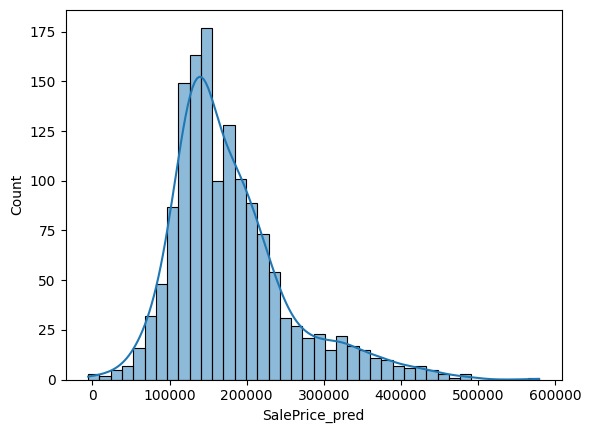

In [158]:
sns.histplot(data=res, x="SalePrice_pred", kde=True)

In [159]:
res.to_csv("RidgeResults.csv", index=False)